# Principle Component Analysis for Facial Recognition

The following libraries will be required for this problem.Import the libraries

In [1]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image
import matplotlib as mp

We load the file names from the directory

In [2]:
file_names=os.listdir(r'C:\Users\Rishab\Assignment-3\A3\dataset')
len(file_names)

520

In [3]:
file_names

['000_000.jpg',
 '000_001.jpg',
 '000_002.jpg',
 '000_003.jpg',
 '000_004.jpg',
 '000_005.jpg',
 '000_006.jpg',
 '000_007.jpg',
 '000_008.jpg',
 '000_009.jpg',
 '000_010.jpg',
 '000_011.jpg',
 '000_012.jpg',
 '000_013.jpg',
 '000_014.jpg',
 '000_015.jpg',
 '000_016.jpg',
 '000_017.jpg',
 '000_018.jpg',
 '000_019.jpg',
 '000_020.jpg',
 '000_021.jpg',
 '000_022.jpg',
 '000_023.jpg',
 '000_024.jpg',
 '000_025.jpg',
 '000_026.jpg',
 '000_027.jpg',
 '000_028.jpg',
 '000_029.jpg',
 '000_030.jpg',
 '000_031.jpg',
 '000_032.jpg',
 '000_033.jpg',
 '000_034.jpg',
 '000_035.jpg',
 '000_036.jpg',
 '000_037.jpg',
 '000_038.jpg',
 '000_039.jpg',
 '000_040.jpg',
 '000_041.jpg',
 '000_042.jpg',
 '000_043.jpg',
 '000_044.jpg',
 '000_045.jpg',
 '000_046.jpg',
 '000_047.jpg',
 '000_048.jpg',
 '000_049.jpg',
 '000_050.jpg',
 '000_051.jpg',
 '000_052.jpg',
 '000_053.jpg',
 '000_054.jpg',
 '000_055.jpg',
 '000_056.jpg',
 '000_057.jpg',
 '000_058.jpg',
 '000_059.jpg',
 '000_060.jpg',
 '000_061.jpg',
 '000_06

The code belowe loads the images.Note that the images in the beginning are coloured,they are 256\*256\*3 dimensional by default where each channel is for R,G AND B respectively.We load the image resize it to 90\*90 and convert it into a 2d array and change it to grayscale.This process is called downscaling of images.

In [4]:
#image_arr=np.array([np.array(Image.open(r'C:\Users\Rishab\Assignment-3\A3\dataset\\'+fname)) for fname in file_names])
image_arr=[]
for fname in file_names:
    image=Image.open(r'C:\Users\Rishab\Assignment-3\A3\dataset\\'+fname)
    sz=(90,90)
    image=image.resize(sz)
    image_arr.append(np.array(image))
image_arr=np.array(image_arr)
rgb_weights = [0.2989, 0.5870, 0.1140]
images_2d =np.array([np.dot(img[...,:3], rgb_weights) for img in image_arr]) 
image_2d=images_2d
images_2d=images_2d.reshape(520,-1)

In [5]:
images_2d.shape

(520, 8100)

Let's see how our image looks like after transfromations.

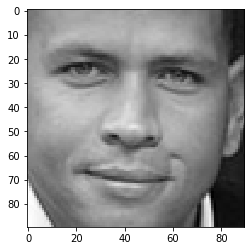

In [6]:
plt.imshow(image_2d[5],cmap=("gray"))

In [7]:
images_2d[5].shape

(8100,)

The following code extracts the labels from the image names.The unique classes with each count is present.Each face has 65 samples and there are total 8 types of faces.

In [8]:
image_classes=[]
for filename in file_names:
    clas=int(filename.split('_')[0])
    image_classes.append(clas)
image_classes=np.array(image_classes)
print(np.unique(image_classes,return_counts=True))
image_classes

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([65, 65, 65, 65, 65, 65, 65, 65], dtype=int64))


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

Lets see some random faces from our dataset.

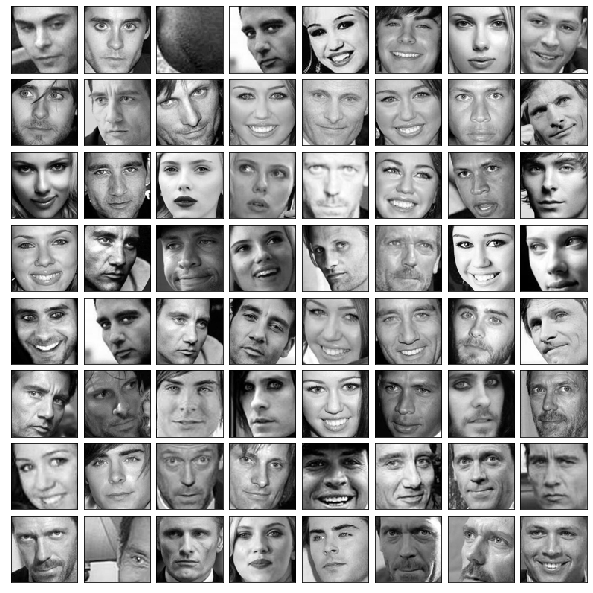

In [9]:
fig = plt.figure(figsize=(8,8)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1) 
# plot 64 random faces
j = 1
for i in np.random.choice(range(image_2d.shape[0]), 64): 
    ax = fig.add_subplot(8, 8, j,xticks=[],yticks=[]) 
    ax.imshow(np.reshape(image_2d[i,:],(90,90)), cmap='gray') 
    j += 1
plt.show()

In [10]:
type(images_2d)

numpy.ndarray

In [11]:
images_2d.shape

(520, 8100)

# PCA for facial recognitioin:What is it and how to do it?

Face recognition is the challenge of classifying whose face is in an input image. This is different than face detection where the challenge is determining if there is a face in the input image.irst of all, if we have a large database of faces, then doing this comparison for each face will take a while! Imagine that we’re building a face recognition system for real-time use! The larger our dataset, the slower our algorithm. But more faces will also produce better results! We want a system that is both fast and accurate.........................................
Dimensionality reduction is a type of unsupervised learning where we want to take higher-dimensional data, like images, and represent them in a lower-dimensional space......................................
One technique of dimensionality reduction is called principal component analysis (PCA). The idea behind PCA is that we want to select the hyperplane such that when all the points are projected onto it, they are maximally spread out. In other words, we want the axis of maximal variance!
......................................
But how do we figure out this axis? We can borrow a term from linear algebra called eigenvectors!This technique is also called eigenfaces.
..........................................
we compute the covariance matrix of our data and consider that covariance matrix’s largest eigenvectors. Those are our principal axes and the axes that we project our data onto to reduce dimensions. Using this approach, we can take high-dimensional data and reduce it down to a lower dimension by selecting the largest eigenvectors of the covariance matrix and projecting onto those eigenvectors.............................
Since we’re computing the axes of maximum spread, we’re retaining the most important aspects of our data. It’s easier for our classifier to separate faces when our data are spread out as opposed to bunched together.............................................



Lets see the plan of attack.
Source:Wikipedia

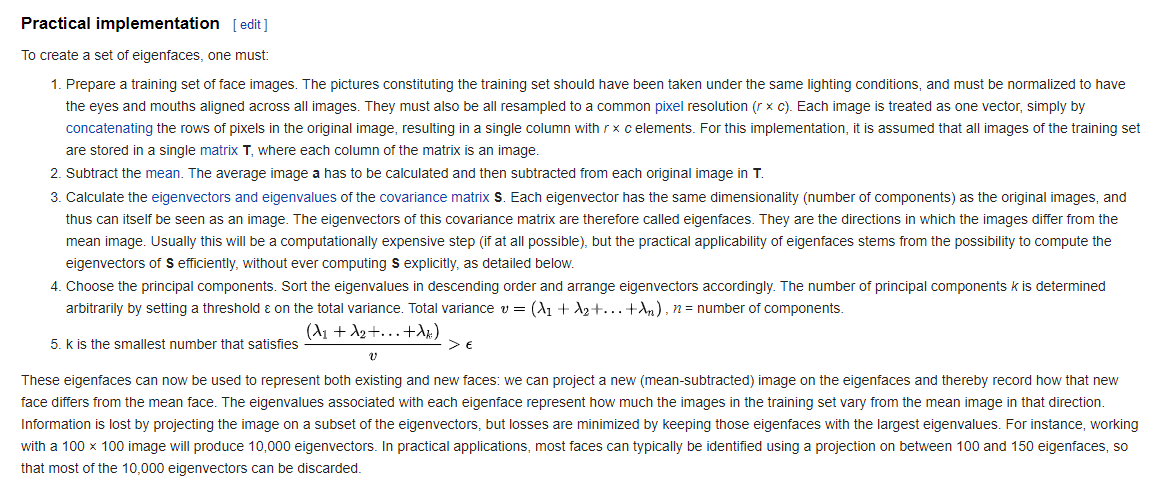

In [12]:
from IPython.display import Image
Image(filename=r'C:\Users\Rishab\Pictures\eigenfaces.png')

Lets first normalize the images.Then we find the covariance matrix.The covariance matrix is d\*d in size where d is the image dimension.We the find the eigen values and eigen vectors of the covariance matrix.
After this we find the top eigen vectors which will be used to reconstruct the images later.

In [13]:
image_mean=np.mean(images_2d,axis=0)
image_mid=images_2d-image_mean
covariance_matrix=np.cov(image_mid.T)
from scipy.linalg import eigh
eig_values, vectors = eigh(covariance_matrix)
eig_pairs = [(eig_values[index],vectors[:,index]) for index in range(len(eig_values))]
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eig_values))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_values))]

# Visualize normalized image

The following image shows how the image looks like after being mean centered(normalized)

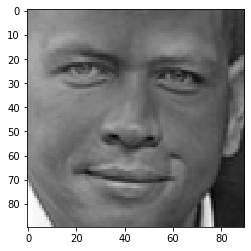

In [14]:
plt.imshow(image_mid[5].reshape(90,90),cmap=("gray"))

In [15]:
eigvalues_sort=np.array(eigvalues_sort)
eigvectors_sort=np.array(eigvectors_sort)
print(covariance_matrix.shape)
print(eigvectors_sort.shape)
print(eigvalues_sort.shape)

(8100, 8100)
(8100, 8100)
(8100,)


The following code sorts the eigenvalues and their corresponding eigen vectors in decreasing order.We select top k components from this set.

In [16]:
indexes=eig_values.argsort()[::-1]
egval=eig_values[indexes]
egvec=vectors[:,indexes]

In [17]:
egval

array([ 4.52379194e+06,  3.51259066e+06,  2.06618602e+06, ...,
       -1.47585495e-09, -1.71905450e-09, -2.70066587e-09])

Below we can see the amount of variance explained by choosing the top i dimensions iteratively.We observe that 95% variance is explained in 150 dimensions.

In [35]:
values=eigvalues_sort[::-1]
eigsum=0
total_sum=np.sum(values)
print("total_sum :",total_sum)
for i in range(len(values)):
    eigsum+=values[i]
    if(i>150):
        break
    if(i%10==0):
        print("eigen_Value",values[i])
        print("variance explained till ",i,'/8100',"th value :",eigsum/total_sum)

total_sum : 21529648.630746044
eigen_Value 4523791.942650909
variance explained till  0 /8100 th value : 0.2101191719492614
eigen_Value 267681.3409915988
variance explained till  10 /8100 th value : 0.6857660063858341
eigen_Value 122870.6815379216
variance explained till  20 /8100 th value : 0.7676070161209176
eigen_Value 78293.56624486779
variance explained till  30 /8100 th value : 0.8114825478984714
eigen_Value 56116.211175828255
variance explained till  40 /8100 th value : 0.8416299104973685
eigen_Value 42473.17154067988
variance explained till  50 /8100 th value : 0.8638089242740468
eigen_Value 32651.826295276343
variance explained till  60 /8100 th value : 0.8809396948624657
eigen_Value 26345.706014817326
variance explained till  70 /8100 th value : 0.8945578838178183
eigen_Value 22572.70726134627
variance explained till  80 /8100 th value : 0.9058214805576988
eigen_Value 18999.195706870956
variance explained till  90 /8100 th value : 0.9153043227098681
eigen_Value 16076.00993920

The following plot shows how the amount of explained variance increases by increasing the number of principal components.

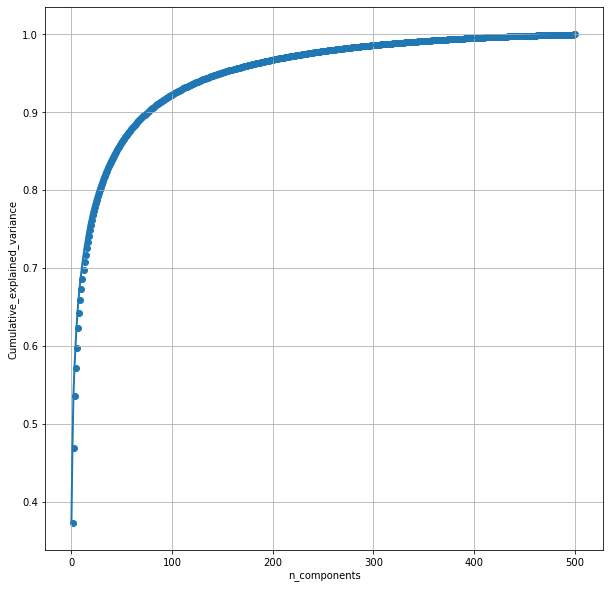

In [19]:
eigsum=0
total_sum=np.sum(values)
cum_var_explained=[]
for i in range(len(values)):
    eigsum+=values[i]
    cum_var_explained.append(eigsum/total_sum)
    
# Plot the PCA spectrum
components=range(1,len(values)+1)
#print(components)
plt.figure(1, figsize=(10, 10))
plt.clf()
plt.plot(cum_var_explained[1:500], linewidth=2)
plt.scatter(components[1:500],cum_var_explained[1:500])
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

# Image with < 20% MSE

Now lets reconstruct the images with the chosen number of components which explains more than 80% variance.(or has less than 20% error)

In [20]:
def redraw_image(eig_vec,orig_image,num_components):
    reduced_vec=np.array(eig_vec[:,:num_components])
    #print(reduced_vec.shape)
    temp_images=np.dot(reduced_vec.T,orig_image.T)
    #print(temp_images.shape)
    new_images=np.dot(reduced_vec,temp_images)
    new_images=new_images.T
    #print(new_images.shape)
    return new_images

In [21]:
new_images=redraw_image(egvec,images_2d,30)

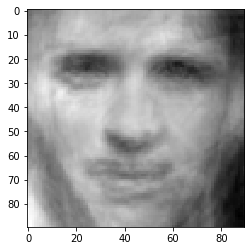

In [22]:
plt.imshow(new_images[5].reshape(90,90),cmap='gray')

The above image is reconstructed by 30 dimensions out of 8100 which explains 80.7% of variance.

We see that we almost get the original like image.How ever we can get even better images if further increase the components.

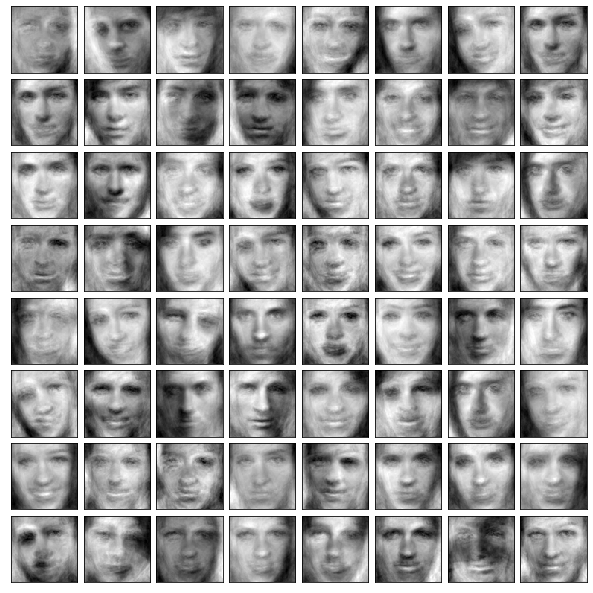

In [23]:
fig = plt.figure(figsize=(8,8)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1) 
# plot 64 random faces
j = 1
for i in np.random.choice(range(new_images.shape[0]), 64): 
    ax = fig.add_subplot(8, 8, j,xticks=[],yticks=[]) 
    ax.imshow(np.reshape(new_images[i,:],(90,90)), cmap='gray') 
    j += 1
plt.show()

In [24]:
better_images=redraw_image(egvec,images_2d,400)

We see that by choosing 400 dimensions out of 8100 dimensions..which is itself a huge reduction,we can perfectly recreate the images.

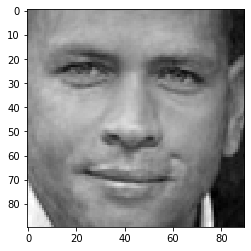

In [25]:
plt.imshow(better_images[5].reshape(90,90),cmap='gray')

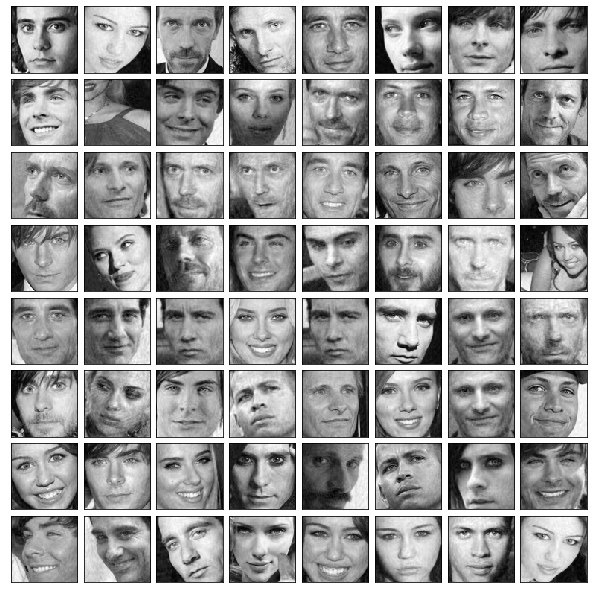

In [26]:
fig = plt.figure(figsize=(8,8)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1) 
# plot 64 random faces
j = 1
for i in np.random.choice(range(better_images.shape[0]), 64): 
    ax = fig.add_subplot(8, 8, j,xticks=[],yticks=[]) 
    ax.imshow(np.reshape(better_images[i,:],(90,90)), cmap='gray') 
    j += 1
plt.show()

# Scatter plot for one,two and three principal components.

In [27]:
def plot_helper(eig_vec,orig_image,num_components):
    reduced_vec=np.array(eig_vec[:,:num_components])
    #print(reduced_vec.shape)
    temp_images=np.dot(reduced_vec.T,orig_image.T)
    temp_images=temp_images.T
    print(temp_images.shape)
    return temp_images

In [28]:
d1_images=plot_helper(egvec,images_2d,1)
d2_images=plot_helper(egvec,images_2d,2)
d3_images=plot_helper(egvec,images_2d,3)

(520, 1)
(520, 2)
(520, 3)


# 1d scatter plot

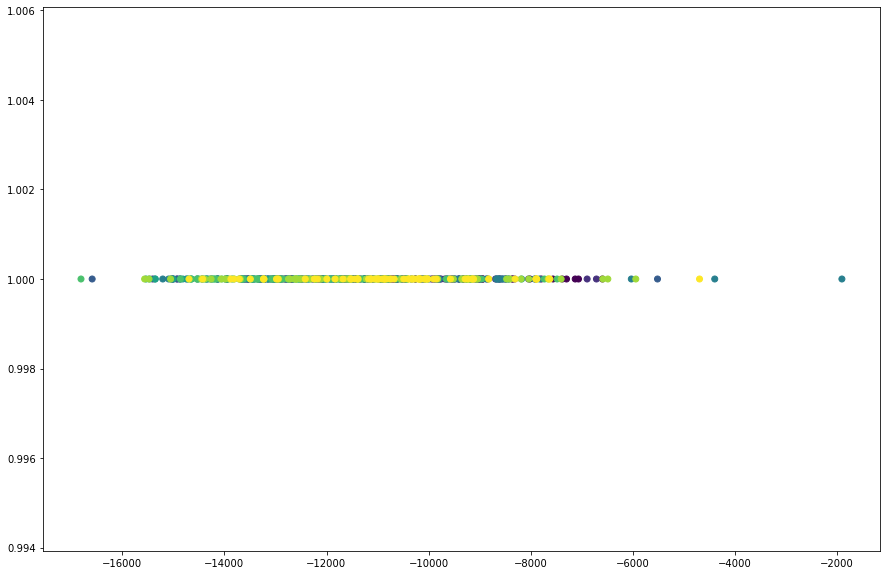

In [29]:
plt.figure(figsize=(15,10))
plt.scatter(d1_images,len(d1_images)*[1],c=image_classes)

# 2d scatter plot

In [30]:
xc=[]
yc=[]
for i in range(d2_images.shape[0]):
    xc.append(d2_images[i][0])
    yc.append(d2_images[i][1])


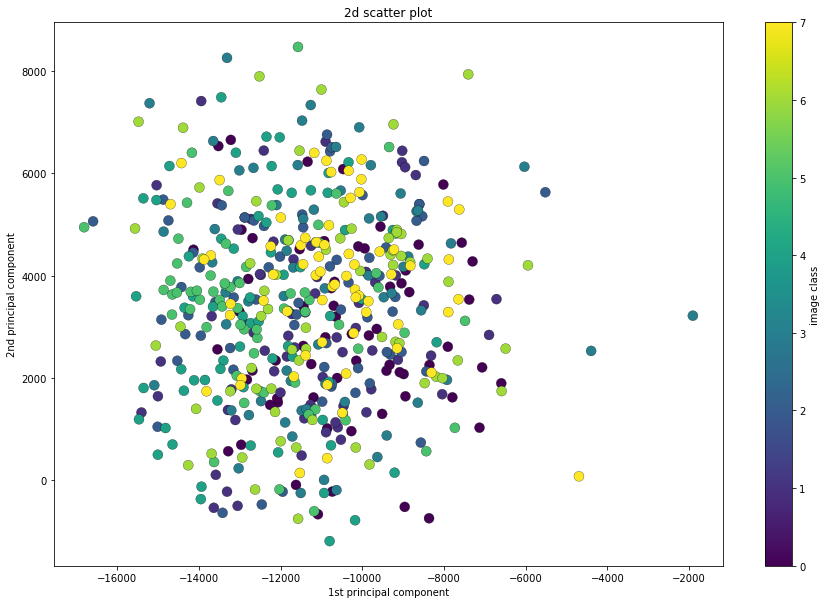

In [31]:
plt.figure(figsize=(15,10))
plt.scatter(xc,yc,lw=0.25,c=image_classes,edgecolor='k',s=100)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('2d scatter plot')
plt.colorbar(ticks=range(8),label='image class')
#plt.clim(-0.5,9.5)

# 3d scatter plot

In [32]:
xc3=[]
yc3=[]
zc3=[]
for i in range(d3_images.shape[0]):
    xc3.append(d3_images[i][0])
    yc3.append(d3_images[i][1])
    zc3.append(d3_images[i][2])
xc3=np.array(xc3)
yc3=np.array(yc3)
zc3=np.array(zc3)

Text(0.5, 0.92, '3d scatter plot')

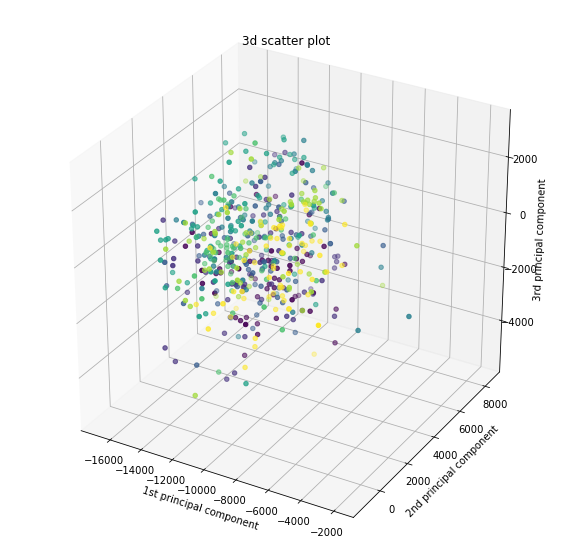

In [33]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xc3,yc3,zc3,c=image_classes,zdir='z',depthshade=True)
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.set_zlabel('3rd principal component')
plt.title('3d scatter plot')

# Mean Square Error vs Number of Components plots

 Now we see how the mean square error between the original images and the reconstructed images looks like.

In [37]:
from tqdm import tqdm
num_components_lst=[]
mse_lst=[]
for num_components in range(1,1000):
    comp_images=redraw_image(egvec,images_2d,num_components)
    mse=np.mean((images_2d-comp_images)**2)
    #print(mse)
    mse_lst.append(mse)
    num_components_lst.append(num_components)

# Number of Components (0-100)

Text(0, 0.5, 'mean square error')

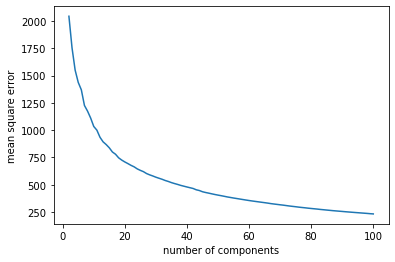

In [38]:
plt.plot(num_components_lst[1:100],mse_lst[1:100])
plt.xlabel('number of components')
plt.ylabel('mean square error')

# Number of Components (100-500)

Text(0, 0.5, 'mean square error')

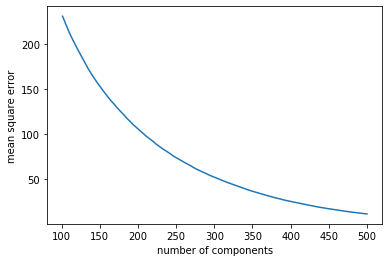

In [39]:
plt.plot(num_components_lst[100:500],mse_lst[100:500])
plt.xlabel('number of components')
plt.ylabel('mean square error')

# Number of Components (500-1000)

Text(0, 0.5, 'mean square error')

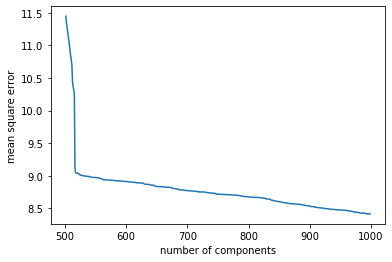

In [40]:
plt.plot(num_components_lst[500:],mse_lst[500:])
plt.xlabel('number of components')
plt.ylabel('mean square error')

# Comparison of scatter plots with sklearn PCA

In [41]:
pca1 = PCA(n_components=1)
img1d=np.array(pca1.fit_transform(images_2d))

In [42]:
pca2 = PCA(n_components=2)
img2d=np.array(pca2.fit_transform(images_2d))

In [43]:
pca3 = PCA(n_components=3)
img3d=np.array(pca3.fit_transform(images_2d))

We see that the scatter plot obtained by our method looks almost exactly like the co-ordinates obtained by sklearn pca.This means our plot works well and can be used for comparison.

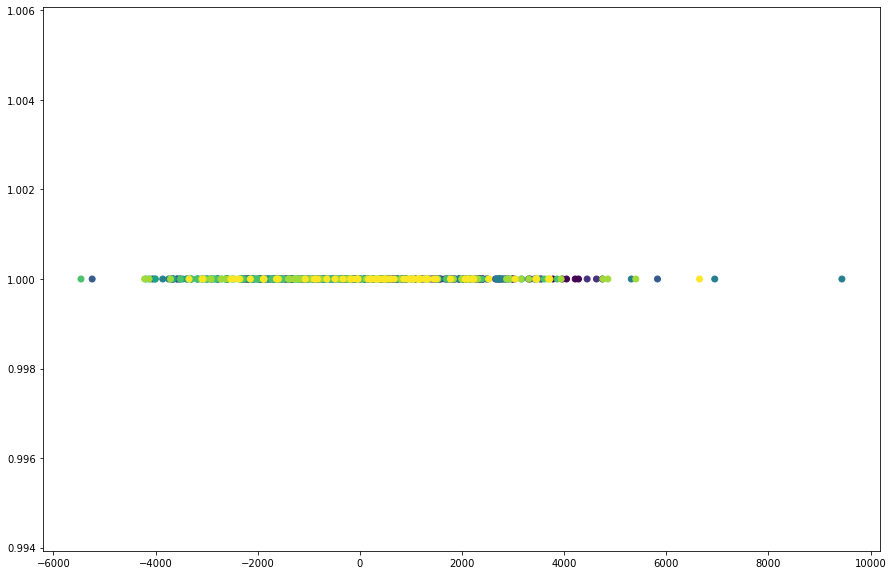

In [44]:
plt.figure(figsize=(15,10))
plt.scatter(img1d,len(img1d)*[1],c=image_classes)

In [45]:
xc2=[]
yc2=[]
for i in range(img2d.shape[0]):
    xc2.append(img2d[i][0])
    yc2.append(img2d[i][1])

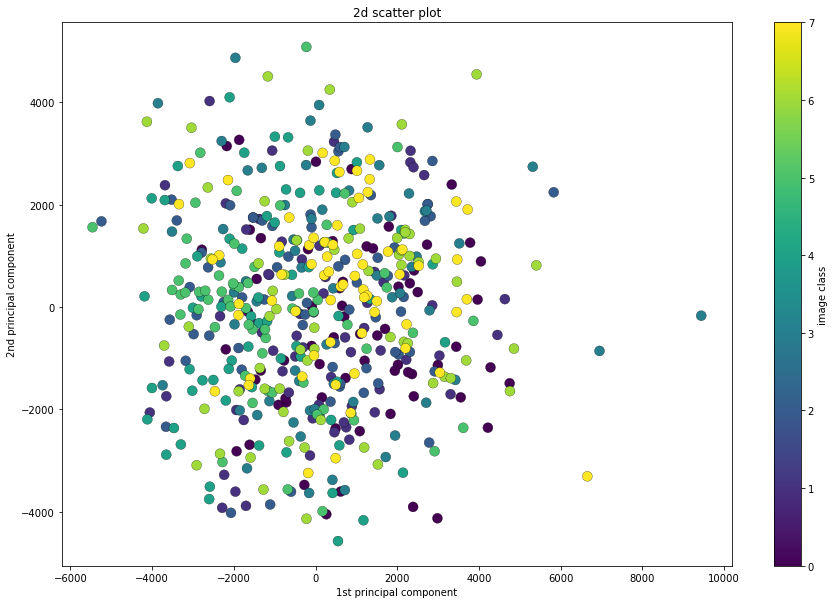

In [46]:
plt.figure(figsize=(15,10))
plt.scatter(xc2,yc2,lw=0.25,c=image_classes,edgecolor='k',s=100)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('2d scatter plot')
plt.colorbar(ticks=range(8),label='image class')
#plt.clim(-0.5,9.5)

In [47]:
xc33=[]
yc33=[]
zc33=[]
for i in range(img3d.shape[0]):
    xc33.append(img3d[i][0])
    yc33.append(img3d[i][1])
    zc33.append(img3d[i][2])
xc33=np.array(xc33)
yc33=np.array(yc33)
zc33=np.array(zc33)

Text(0.5, 0.92, '3d scatter plot')

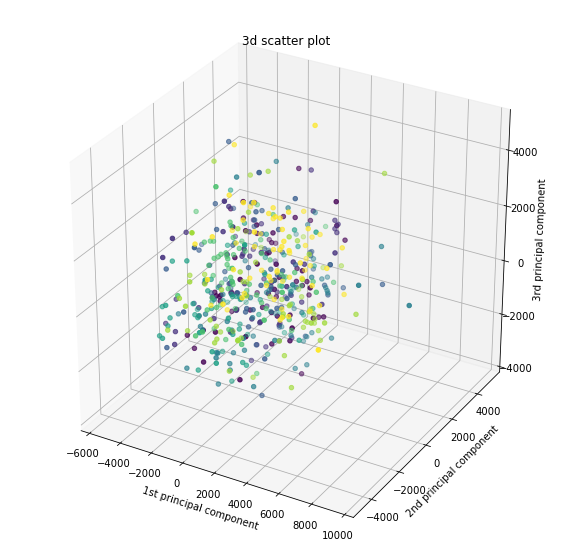

In [49]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xc33,yc33,zc33,c=image_classes,zdir='z',depthshade=True)
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.set_zlabel('3rd principal component')
plt.title('3d scatter plot')